In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#import data set
Italy_covid19_df = pd.read_csv("/Users/perliljekvist/Documents/Italy Covid-19/covid19_italy_region.csv", 
                               encoding='utf-8')

In [3]:
#initial eda

#Italy_covid19_df.shape
#Italy_covid19_df.tail(4)
#Italy_covid19_df['RegionName'].unique()
Italy_covid19_df.info()
Italy_covid19_df.Date.max() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 17 columns):
SNo                          2121 non-null int64
Date                         2121 non-null object
Country                      2121 non-null object
RegionCode                   2121 non-null int64
RegionName                   2121 non-null object
Latitude                     2121 non-null float64
Longitude                    2121 non-null float64
HospitalizedPatients         2121 non-null int64
IntensiveCarePatients        2121 non-null int64
TotalHospitalizedPatients    2121 non-null int64
HomeConfinement              2121 non-null int64
CurrentPositiveCases         2121 non-null int64
NewPositiveCases             2121 non-null int64
Recovered                    2121 non-null int64
Deaths                       2121 non-null int64
TotalPositiveCases           2121 non-null int64
TestsPerformed               966 non-null float64
dtypes: float64(3), int64(11), object(3)
memory usag

'2020-06-03T17:00:00'

In [4]:
Italy_covid19_df['Date'] = Italy_covid19_df['Date'].astype('datetime64[ns]') 

In [5]:
Italy_covid19_df["RegionName"].unique()

array(['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania',
       'Emilia-Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
       'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
       'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [6]:
#Italy_covid19_df['ItalySplit'] = 'null'

In [7]:
#split Italy in North, Mid and South 

#North 
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Lombardia", "ItalyThreeSplit"] = "North"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Veneto", "ItalyThreeSplit"] = "North"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Valle d\'Aosta", "ItalyThreeSplit"] = "North"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Piemonte", "ItalyThreeSplit"] = "North"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "P.A. Bolzano", "ItalyThreeSplit"] = "North"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Emilia Romagna", "ItalyThreeSplit"] = "North"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "P.A. Trento", "ItalyThreeSplit"] = "North"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Liguria", "ItalyThreeSplit"] = "North"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Friuli Venezia Giulia", "ItalyThreeSplit"] = "North"

#Mid

Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Toscana", "ItalyThreeSplit"] = "Mid"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Marche", "ItalyThreeSplit"] = "Mid"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Umbria", "ItalyThreeSplit"] = "Mid"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Lazio", "ItalyThreeSplit"] = "Mid"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Abruzzo", "ItalyThreeSplit"] = "Mid"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Molise", "ItalyThreeSplit"] = "Mid"

#South

Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Campania", "ItalyThreeSplit"] = "South"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Basilicata", "ItalyThreeSplit"] = "South"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Puglia", "ItalyThreeSplit"] = "South"
Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Calabria", "ItalyThreeSplit"] = "South"

#Sicily. Will for now count as south but can in the future be interesting to sinlge out

Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Sicilia", "ItalyThreeSplit"] = "South"

#Sardinia Will for now be ignored

Italy_covid19_df.loc[Italy_covid19_df.RegionName == "Sardegna", "ItalyThreeSplit"] = "Sardinia"

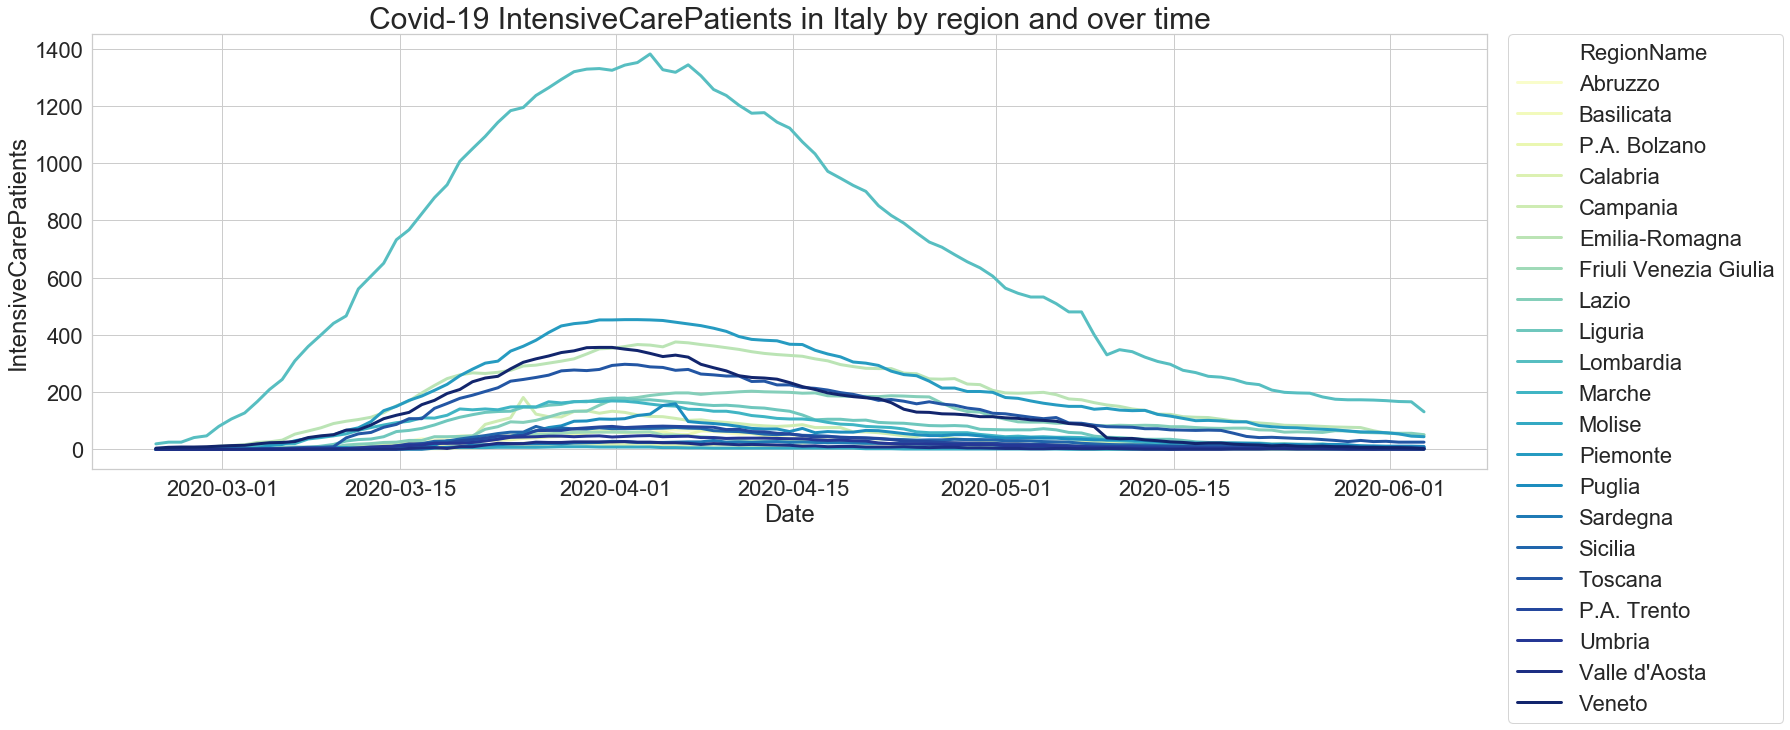

In [8]:
#deaths by region

measure = 'IntensiveCarePatients'

plt.figure(figsize=(25, 8))
#plt.yscale('log')

style = sns.set(style="whitegrid",
        font_scale=2,
        rc={"lines.linewidth": 3.0})
sns.lineplot(x="Date", 
             y=measure,  
             hue="RegionName",
             palette="YlGnBu",
             data=Italy_covid19_df).set_title( 'Covid-19 ' + measure + ' in Italy by region and over time',fontsize=30)

plt.legend(bbox_to_anchor=(1.015, 1), loc=2, borderaxespad=0)

In [9]:
# group by date and north, mid and south

grouped_by_region_df = Italy_covid19_df.groupby(['Date', 'ItalyThreeSplit'],
                                                as_index=False)['IntensiveCarePatients', 
                                                'Deaths', 
                                                'NewPositiveCases',
                                                'CurrentPositiveCases',
                                                 'HomeConfinement', 
                                                 'Recovered',
                                                 'TestsPerformed'].sum()

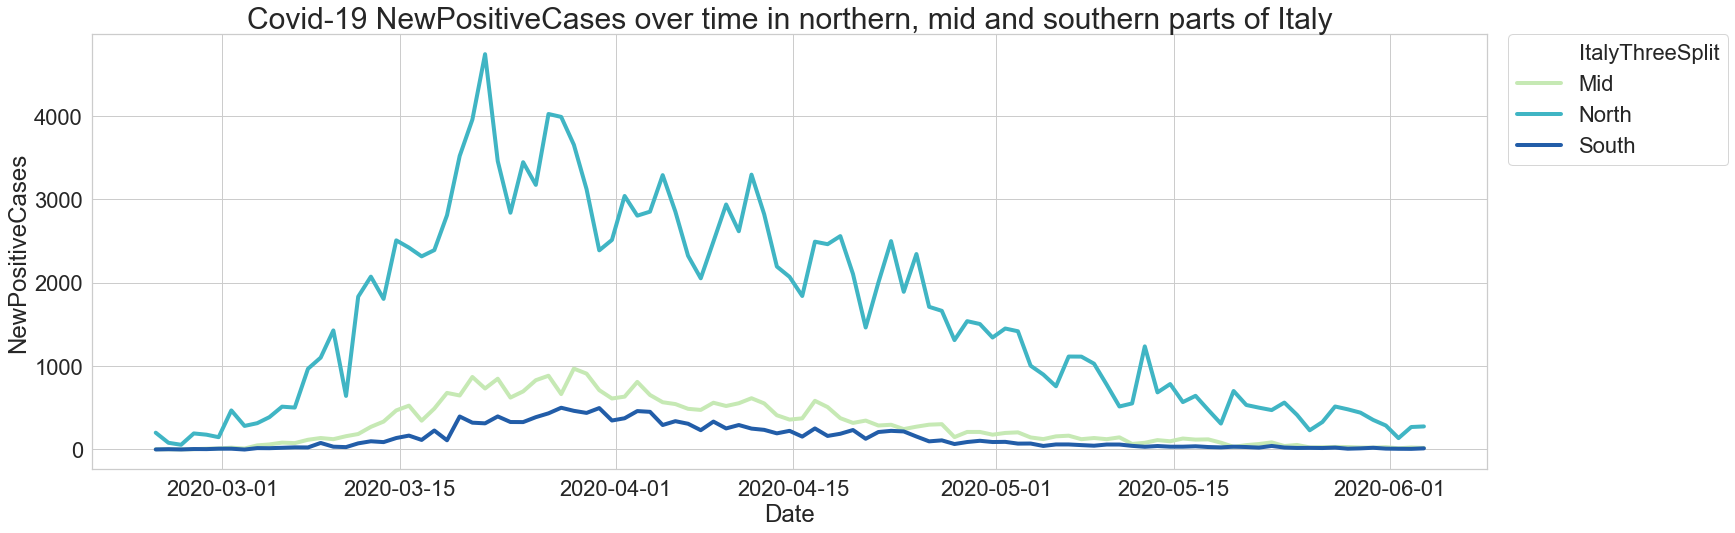

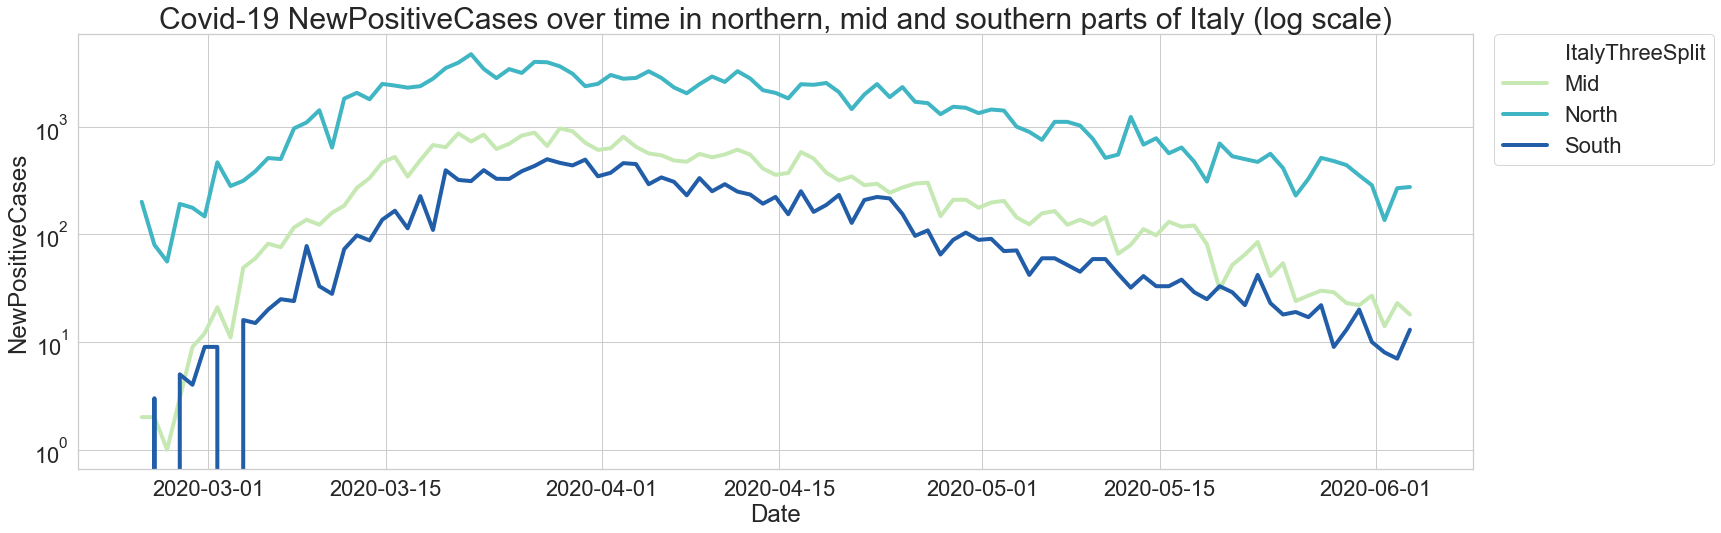

In [10]:
measure = 'NewPositiveCases'

plt.figure(figsize=(25, 8))

style = sns.set(style="whitegrid",
        font_scale=2,
        rc={"lines.linewidth": 4.0})

sns.lineplot(x="Date", 
             y=measure,  
             hue="ItalyThreeSplit",
             palette="YlGnBu",
             data=grouped_by_region_df[grouped_by_region_df.ItalyThreeSplit != 'Sardinia']).set_title( 'Covid-19 ' + measure + ' over time in northern, mid and southern parts of Italy',fontsize=30)

plt.legend(bbox_to_anchor=(1.015, 1), loc=2, borderaxespad=0)

#logarithmic y scale 

plt.figure(figsize=(25, 8))
plt.yscale('log')

style = sns.set(style="whitegrid",
        font_scale=2,
        rc={"lines.linewidth": 4.0})

sns.lineplot(x="Date", 
             y=measure,  
             hue="ItalyThreeSplit",
             palette="YlGnBu",
             data=grouped_by_region_df[grouped_by_region_df.ItalyThreeSplit != 'Sardinia']).set_title( 'Covid-19 ' + measure + ' over time in northern, mid and southern parts of Italy (log scale)',fontsize=30)

plt.legend(bbox_to_anchor=(1.015, 1), loc=2, borderaxespad=0)